In [161]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st

import warnings
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
warnings.filterwarnings(action='ignore')

## 11.1

다음의 자료는 몸무게와 가슴둘레의 연관성을 알아보기 위해 랜덤하게 뽑은 신생아로부터 얻은 자료이다. 물음에 답하여라


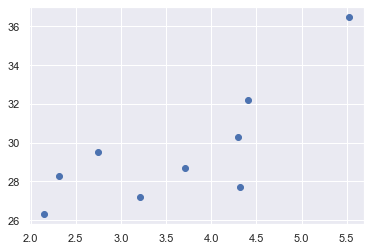

In [162]:
#dataloab
weight=[2.75,2.15,4.41,5.52,3.21,4.32,2.31,4.30,3.71]
length=[29.5,26.3,32.2,36.5,27.2,27.7,28.3,30.3,28.7]
size= pd.DataFrame({'weight':weight,'length':length})
plt.scatter(weight,length)

### 표본 상관계수를 구하여라

In [163]:
#표본의 크기 저장
n = len(weight) 
# 표본 상관계수를 구하자
x = np.array(weight)
y = np.array(length)
# x와 y의 각각의 평균
xbar = np.mean(x)
ybar = np.mean(y)
# 공식에 따라
Sxx =((x-xbar)**2).sum()
Sxy=((x-xbar)*(y-ybar)).sum() 
Syy=((y-ybar)**2).sum() 

r  = Sxy / (math.sqrt(Sxx) * math.sqrt(Syy) )
print("표본 상관계수 r: " ,round(r,5))

표본 상관계수 r:  0.78447


In [164]:
# 파이썬도 r  과같은 계산이 있다!
print("내장 함수 이용시 r :",np.corrcoef(x, y)[0,1])

내장 함수 이용시 r : 0.7844691194903474


### 두 변수간에 양의 상관관계가 있다고 할 수 있는지 유의수준 1%에서 검정하여라.

 두 변수간의 양의 상관관계 만족 a = 0.01 로 검정
 
 
 p =/= 0 일시 선형관계가 없으며
 p > 0 일시 양의 상관관계 ,    p < 0 일시 음의 상관관계를 갖는다라고 볼수 있다.
 p= Corr(x,y)
 
 1)
 귀무 가설 H0, 대립가설 H1 일시
 
 H0 : p = 0 vs H1 : p > 0 
 
 2) 
 Under H0  ~ 검정 통계량 T 의 관측값은 다음과 같다. 
 
 자료가 n<= 30 인 소표본이며 n-2 인 t 분포를 따른다. 
 또한 P>0 임을 확인하는 한쪽 꼬리 검정을 이용한다.

In [165]:
T = math.sqrt(n-2) * (r / math.sqrt(1-r**2)) 
print("검정 통계량의 관측값 T:",T)
print("")


# 유의 확률 ~1%
a = 1-(0.01)
df = n-2    # 자유도 
ts = st.t.ppf(a,df)
print("--기각역--")
print("t0 >",ts,"를 만족시 H0를 기각")

검정 통계량의 관측값 T: 3.346690896328029

--기각역--
t0 > 2.9979515668685277 를 만족시 H0를 기각


t0 = T = 3.34 > 2.99 을 만족함으로 , 귀무 가설을 기각한다.
* 결론 )

귀무가설(H0)하 관측값이 기각역에 속하므로 , 유의 수준 1% 하에 두변수 간의 양의 상관관계가 존재한다고 할 
근거가 있다.

In [166]:
#추가 p-value check  <0.01
t0 = T
print("P_value",(1-st.t.cdf(abs(t0),df)))

P_value 0.006153189532095316


##  11.2

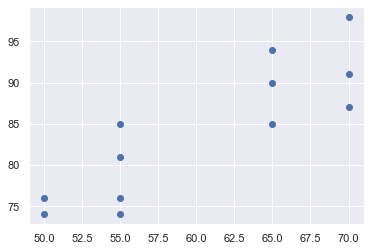

In [167]:
# 이해력 테스트 점수를 n_s ,  수학 점수를 m_s 라 하면 산점도는 다음과 같다.
n_s = [65 ,50 ,55 , 65, 55, 70, 65, 70, 55, 70, 50, 55]
m_s = [85, 74, 76, 90, 85, 87, 94, 98, 81, 91, 76, 74]
plt.scatter(n_s,m_s)

### 
표본 상관계수 r:  0.86245

In [168]:
# 두점수 사의 표본 상관 계수를 구한다. 방법은 1번 문제와 동일하다.
#표본의 크기 저장
n = len(n_s) 
# 표본 상관계수를 구하자
x = np.array(n_s)
y = np.array(m_s)
# x와 y의 각각의 평균
xbar = np.mean(x)
ybar = np.mean(y)
# 공식에 따라
Sxx =((x-xbar)**2).sum()
Sxy=((x-xbar)*(y-ybar)).sum() 
Syy=((y-ybar)**2).sum() 

r  = Sxy / (math.sqrt(Sxx) * math.sqrt(Syy) )
print("표본 상관계수 r: " ,round(r,5))

표본 상관계수 r:  0.86245


### 

다음을 유의 수준 1% 에서 검정하자

가설:

귀무 가설 H0: p =0 , 대립가설 H1 : p=/= 0
 
Under H0  ~ 검정 통계량 T 의 관측값은 다음과 같다. 
 
 자료가 n<= 30 인 소표본이며 n-2 인 t 분포를 따른다. 
 
 또한 P=/=0 임을 확인하는 양쪽 꼬리 검정을 이용한다.

In [169]:
# 검정 통계량 의 관측값
T = math.sqrt(n-2) * (r / math.sqrt(1-r**2)) 
print("검정 통계량의 관측값 t0: ",T)
print(" ")
# 유의 확률 ~1% 양쪽 검정일시
a = 1-(0.01/2) # 양쪽 검정시 유의 수준 -> 0.005

df = n-2    # 자유도 
ts = st.t.ppf(a,df)
print("--기각역--")
print("|t0| >",round(ts,4),"를 만족시 H0를 기각")

검정 통계량의 관측값 t0:  5.388531251010297
 
--기각역--
|t0| > 3.1693 를 만족시 H0를 기각


* 결론 )

귀무 가설하 검정통계량이 t0 = 5.38 >  3.1693  을 만족함으로 유의수준 1%에서 두 변수 간의 상관관계가 존재한다고 할 수 있다.

## 11.3

In [170]:
# 중간 고사를 x ,기말 고사를 y라 하면
x = [78, 80, 66,92,90,57,99,80,70,82]
y = [60, 80, 72,100,88,80,70,92,99,90]

### 산점도를 그리고 선형 관계를 검토하여라.


Text(0, 0.5, 'final term score')

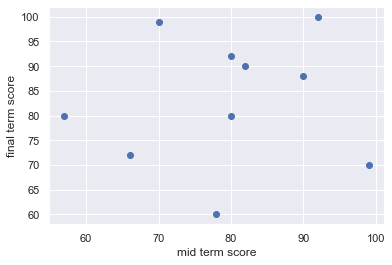

In [171]:
plt.scatter(x,y)
plt.xlabel("mid term score")
plt.ylabel("final term score")

선형 관계가 눈에띄게 보이지는 않는다.

### 표본 상관계수를 구하여라.

In [172]:
# 두점수 사의 표본 상관 계수를 구한다. 방법은 1번 문제와 동일하다.
#표본의 크기 저장
n = len(x) 
# 표본 상관계수를 구하자
x = np.array(x)
y = np.array(y)
# x와 y의 각각의 평균
xbar = np.mean(x)
ybar = np.mean(y)
# 공식에 따라
Sxx =((x-xbar)**2).sum()
Sxy=((x-xbar)*(y-ybar)).sum() 
Syy=((y-ybar)**2).sum() 

r  = Sxy / (math.sqrt(Sxx) * math.sqrt(Syy) )
print("")
print("표본 상관계수, r =" ,round(r,5))


표본 상관계수, r = 0.08796


###  단순선형회귀모형을 가정할 때, 회귀계수의 최소제곱추정치를 구하고 회귀식을 추정하여라.


In [173]:
## 최소제곱추정량 공식을 적용한다.

b1 = np.sum( ((x-xbar)*(y-ybar)) / np.sum((x-xbar)*(x-xbar)))
b0 = ybar - b1*xbar
print(round(b1,3),round(b0,3))

0.091 75.871


* 추정 회귀식  y_hat = y

    y= 75.871 + 0.091x

In [174]:
# 내장 함수 이용시  회귀 계수만 출력시
df= pd.DataFrame({'x':x,'y':y})
model = ols('y ~ x',df).fit()
print(model.params)

Intercept    75.870747
x             0.091049
dtype: float64


## 11.4

다음 주어진 자료를 이용하여 물음에 답하여라

n = 20

function sum() is sum of all to i = 20

sum(x) = 300

sum(y) = 260

sum(x^2) = 4660

sum(y^2) = 3463.2

sum(x*y) = 3990

In [175]:
# 주어진 값들을 실수형으로 전환
n = 20.0
x_sum = 300.0
y_sum = 260.0
x2_sum = 4660.0
y2_sum = 3463.2
xy_sum = 3990.0

###  단순선형회귀모형을 가정할 때, 회귀직선을 추정하여라.

추정 회귀식 

y = b0 + b1x

In [176]:
b1 = (xy_sum - (x_sum*y_sum)/n) / (x2_sum - (x_sum**2)/n)
b0 = (y_sum/n) -(b1*(x_sum/n))

print("기울기 추정 b1:",b1)
print("절편 추정값 b0:",b0)

기울기 추정 b1: 0.5625
절편 추정값 b0: 4.5625


그렇므로 추정식 y_hat 는 다음과 같다.

y_hat = 4.5625 + 0.5625x

### x=20일 때 Y의 95% 신뢰구간을 구하여라


* 평균 반응치에 대한 추론

(a+b*(20)) ± (tα/2)(n−2)* √{MSE(1/n+(20−x_bar)^2 / ∑(x−x_bar)^2)}

In [177]:
SST  = y2_sum - ((y_sum**2)/n)
SSR = (xy_sum - (x_sum*y_sum)/n)**2 / (x2_sum-((x_sum)**2)/n)
SSE = SST - SSR
MSE = SSE / (n-2)

print("SST",round(SST,3))
print("SSR",round(SSR,3))
print("SSE",round(SSE,3))
print("MSE",round(MSE,3))

SST 83.2
SSR 50.625
SSE 32.575
MSE 1.81


In [178]:
# t_a  5% 유의 확률, 양측 검정을 이용한다.
a = 1-(0.05/2) # 양쪽 검정시 유의 수준 -> 0.005
df = int(n-2)    # 자유도 
t_a = st.t.ppf(a,df)
print(t_a)

2.10092204024096


In [179]:
# 신뢰도 구간 C.I  x =20 일때
x_bar = x_sum / n

Sxx = x2_sum - (2 * x_sum*x_bar) + n*(x_bar)**2
    # = (x2_sum - n*(x_sum/n)**2)
    
print ( (b0 + b1 * 20) - t_a * math.sqrt(MSE * ( (1/n)+ ( (20 - x_bar)**2)/(Sxx))))    
print ( (b0 + b1 * 20) + t_a * math.sqrt(MSE * ( (1/n)+ ( (20 - x_bar)**2)/(Sxx))))

14.528949750641083
17.096050249358917


 x=20일 때 Y의 95% 신뢰구간은 다음과 같다.
 
 (14.529,17.096)

## 11.5

어느 병원에서 흡연자들을 대상으로 하루 흡연량이 폐암 발생 후 사망시점에 미치는 영향을 알아보기 위해 조사한 것이다.

In [180]:
# y = 기간 , x = 하루 흡연수
y  = [36, 30, 25, 23, 20, 15, 12, 9, 5, 3]
x =[]
for i in range(2,len(y)+2):
    x.append(i*2+1)
x = np.array(x)
y = np.array(y)

print("하루 흡연수 (x):",x)
print("기간 단위 월 (y):",y)

하루 흡연수 (x): [ 5  7  9 11 13 15 17 19 21 23]
기간 단위 월 (y): [36 30 25 23 20 15 12  9  5  3]


### 회귀직선 적합을 위해 회귀계수의 추정치를 구하여라.

In [181]:
## 최소제곱추정량 공식을 적용한다.
n=len(x)
xbar = np.mean(x)
ybar = np.mean(y)
b1 = np.sum( ((x-xbar)*(y-ybar)) / np.sum((x-xbar)*(x-xbar)))
b0 = ybar - b1*xbar
print(round(b1,3),round(b0,3))

-1.788 42.83


* 추정 회귀식 

y_hat = 42.830−1.788x

### 분산분석표를 작성하고 추정된 회귀직선이 유의한지 유의수준 5%에서 검정하여라.

In [182]:
avg_y= ybar # ybar
array_reg = x*b1+b0
array_y = y
SSR =((array_reg-avg_y)**2).sum()
SSE =((array_y-array_reg)**2).sum()      #Syy - b1*Sxy
SST =SSR+SSE


MSR = SSR / 1
MSE = SSE / ( n-2 )

In [183]:
print("---------------------------------------------------------------")
print("요인     |     제곱합      |      자유도    |     평균제곱   |     F값")
print("---------------------------------------------------------------")
print("회귀     |",round(SSR,5),"   |     1         | ",round(MSR,5),"|",round((MSR/MSE) ,4))
print("---------------------------------------------------------------")
print("잔차     |",round(SSE,5),"     |     8         | ",round(MSE,5),"   |")
print("---------------------------------------------------------------")
print("계      |",round(SST,5),"      |     9         | ")
print("---------------------------------------------------------------")



---------------------------------------------------------------
요인     |     제곱합      |      자유도    |     평균제곱   |     F값
---------------------------------------------------------------
회귀     | 1054.84848    |     1         |  1054.84848 | 784.8929
---------------------------------------------------------------
잔차     | 10.75152      |     8         |  1.34394    |
---------------------------------------------------------------
계      | 1065.6       |     9         | 
---------------------------------------------------------------


In [184]:
# 내장 함수 이용 가능
# smoke= pd.DataFrame({'smoke':x,'period':y})
# model = ols('period~ smoke',smoke).fit()
# model.summary()
# anova_lm(model)

회귀모형의 직선이 유의성을 검정한다.

기울기를  b 라고 하면 귀무 가서 H0 및 대립 가설 H1 은 다음과 같다.

가설 
H0 : B =0  vs H1 : B =/= 0


기각역:
F0 > F0.05(1,8) 일 시 H0 를 기각한다.

In [185]:
a = 1-(0.05) # 단측 검정시 유의 수준 -> 0.005
f_a = st.f.ppf(a,1,8)
print(round(f_a,3))

5.318


결론 )

분산 분석표와 구한 기각역에 따라   784.8929 > 5.318 이므로

귀무가설하 검정통계량의 관측값이 기각역에 속하므로 귀무가설을 기각한다.

따라서 회귀직선이 유의하다고 할 충분한 근거가 있다.

In [186]:
z0 = 784.8929
df1 = 1
df2 = 8
print("one way p_value =",st.f.sf(abs(z0),df1,df2),"< a= 0.05")

one way p_value = 2.845248590052884e-09 < a= 0.05


### 결정계수를 구하고 그 의미를 설명하여라.

결정계수 R^2 는 추정된 회귀선이 얼마 주어진 데이터에 대하여 설명이 가능한지 신뢰 정도를 알려준다.

1에 가까울 수록 회귀 직선의 model 이 의미가 있다.

단순 선형회귀에서는 {cor(y,y_hat)}^2 으로 나타낼수있다.

In [187]:
# R^2 = (SSR/SST) = (1 -(SSE / SST))
#print(SSR/SST)
print(" 결정계수 R^2 :", round(1-(SSE / SST),3))

 결정계수 R^2 : 0.99



즉 구한 결정계수의 따르면 총 변동의 99%를 회귀 직선이 설명 가능하다.
 

## 11.8 
다음은 어떤 제품에 대하여 광고비에 따른 판매량의 변화를 조사한 자료이다. 물음에 답하여라.

In [188]:
x =[30, 30, 25, 20, 40, 35, 20, 50, 45, 20]
y =[300, 350, 400, 280, 470, 380, 300, 500, 540, 340]

### 회귀식을 추정하고, α와 β의 95% 신뢰구간을 구하여라

In [189]:
x = np.array(x)
y = np.array(y)


xbar = np.mean(x)
ybar = np.mean(y)

b1 = np.sum( ((x-xbar)*(y-ybar)) / np.sum((x-xbar)*(x-xbar)))
b0 = ybar - b1*xbar

print("회귀 직선 추정")
print("y = ",b0,"+",b1,"x")

회귀 직선 추정
y =  155.24940617577195 + 7.32541567695962 x


In [190]:
avg_y= ybar # ybar
array_reg = x*b1+b0
array_y = y

SSE =((array_y-array_reg)**2).sum()      #Syy - b1*Sxy
SST =((avg_y-array_reg)**2).sum()
Total =((array_y-avg_y)**2).sum()       #Syy

MSE = SSE/(n-2)
s = math.sqrt(MSE)
# print(s)


Sxx =((x-xbar)**2).sum()
Sxy=((x-xbar)*(y-ybar)).sum() # (Total-SSE)/b1
Syy=((y-ybar)**2).sum()   # total

# 유의 확률 
a = 1-(0.05/2)
df = n-2    # 자유도 
ts = st.t.ppf(a,df)
# print("t 기준:",ts)



b1d =b1 - ((s*ts)/ math.sqrt(Sxx))
b1u = b1 + ((s*ts)/ math.sqrt(Sxx))  # upper

print("기울기의 95% 신뢰도 구간:")
print(round(b1d,4),",",round(b1u,4))

xd= (x**2).sum()
b0d = b0 - ((s*ts*math.sqrt(xd))/ math.sqrt(n*Sxx))
b0u = b0 + ((s*ts*math.sqrt(xd))/ math.sqrt(n*Sxx))

print("절편의 95% 신뢰도 구간:")
print(round(b0d,4),",",round(b0u,4))

기울기의 95% 신뢰도 구간:
4.0525 , 10.5983
절편의 95% 신뢰도 구간:
46.8236 , 263.6752


### 분산분석표를 작성하여라.


In [191]:
SSR =((array_reg-avg_y)**2).sum()
SSE =((array_y-array_reg)**2).sum()      #Syy - b1*Sxy
SST =SSR+SSE

MSR = SSR / 1
MSE = SSE / ( n-2 )

In [192]:
print("-----------------------------------------------------------------")
print("요인     |     제곱합      |      자유도    |     평균제곱   |     F값")
print("-----------------------------------------------------------------")
print("회귀     |",round(SSR,5),"   |     1       | ",round(MSR,5),"|",round((MSR/MSE) ,4))
print("-----------------------------------------------------------------")
print("잔차     |",round(SSE,5),"   |     8       | ",round(MSE,5)," |")
print("-----------------------------------------------------------------")
print("계      |",round(SST,5),"       |     9        | ")
print("-----------------------------------------------------------------")



-----------------------------------------------------------------
요인     |     제곱합      |      자유도    |     평균제곱   |     F값
-----------------------------------------------------------------
회귀     | 56478.95487    |     1       |  56478.95487 | 26.6394
-----------------------------------------------------------------
잔차     | 16961.04513    |     8       |  2120.13064  |
-----------------------------------------------------------------
계      | 73440.0        |     9        | 
-----------------------------------------------------------------


### 

가설)

H0:β=0 vs. H1:β≠0라는 가설을 유의수준 5%에서 검정하여라.

기각역)
 
F0>F0.05(1,8) 이면 H0 기각

In [193]:
a = 1-(0.05) # 단측 검정시 유의 수준 -> 0.005
f_a = st.f.ppf(a,1,8)
print(round(f_a,3))

5.318


결론)

26.639 > 5.318 즉, 귀무가설하 검정통계량의 관측값이 기각역에 속하므로 귀무가설을 기각한다. 

따라서 기울기가 0이 아니라고 할 충분한 근거가 있다.